In [44]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

In [45]:
ice_cream_interest = pd.read_csv('datasets/pondi.csv')

In [46]:
ice_cream_interest['Month'] = pd.to_datetime(ice_cream_interest['Month'])

In [47]:
ice_cream_interest.set_index('Month', inplace=True)
ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))

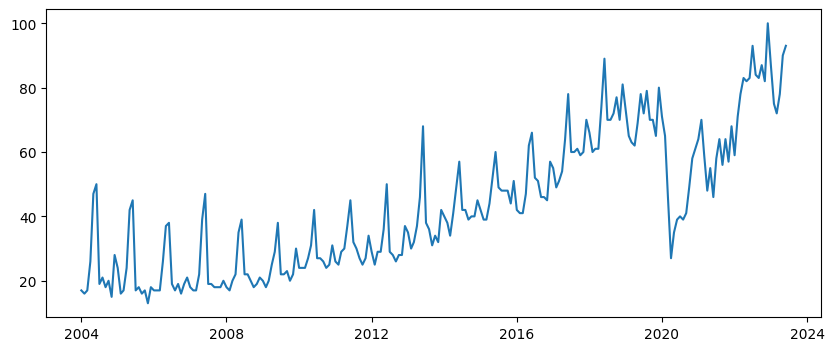

In [48]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

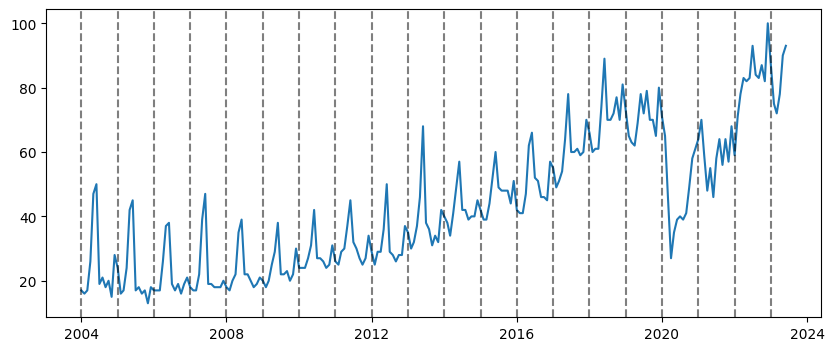

In [49]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

In [50]:
stl = STL(ice_cream_interest['pondi'])
result = stl.fit()

In [51]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

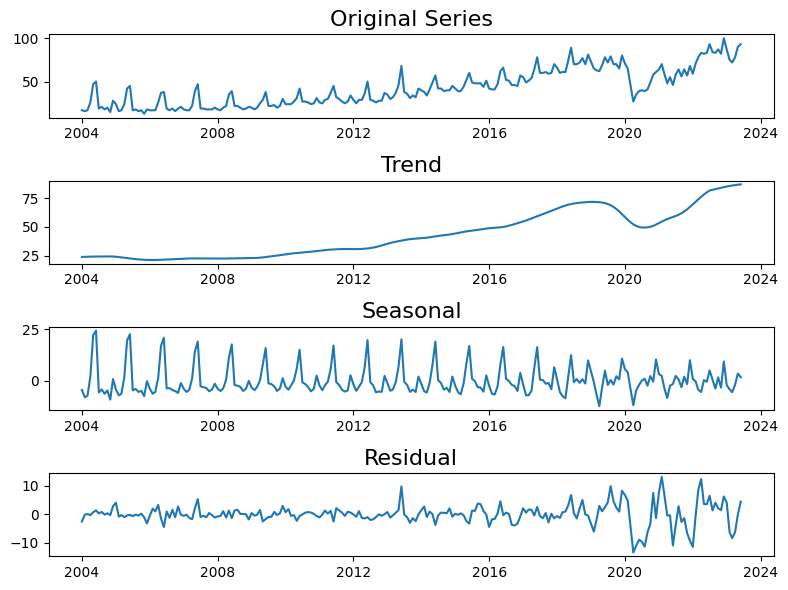

In [52]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

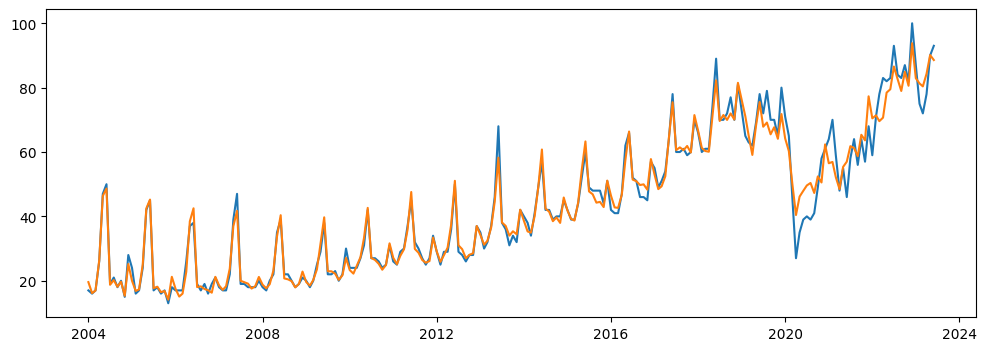

In [53]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

In [54]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(12296.0, 18597.0)

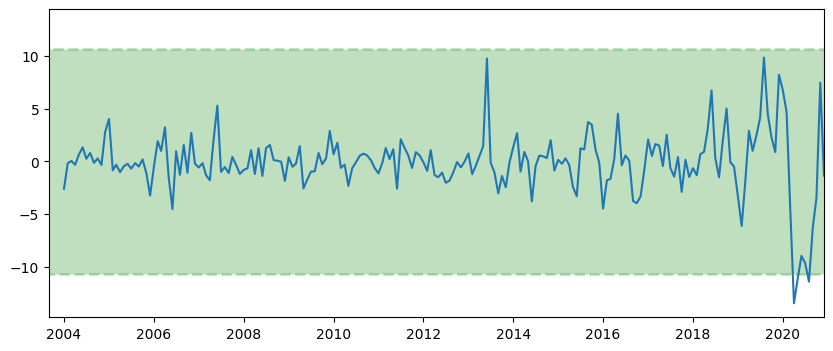

In [55]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [56]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

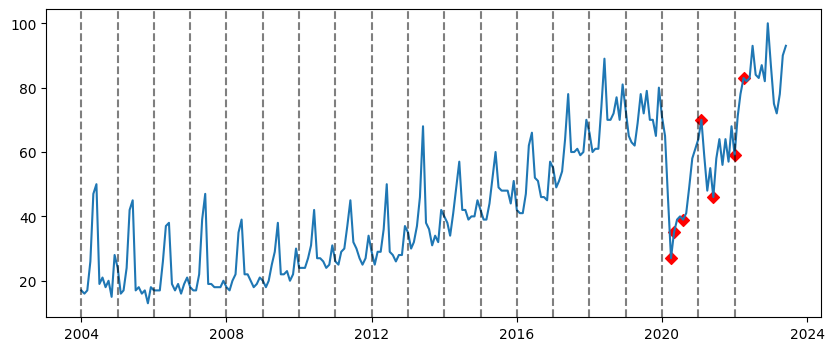

In [57]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2023):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.pondi, color='r', marker='D')

In [58]:
anomalies

,pondi
Month,
2020-04-01,27
2020-05-01,35
2020-08-01,39
2021-02-01,70
2021-06-01,46
2022-01-01,59
2022-04-01,83
